In [8]:
!pip install pillow

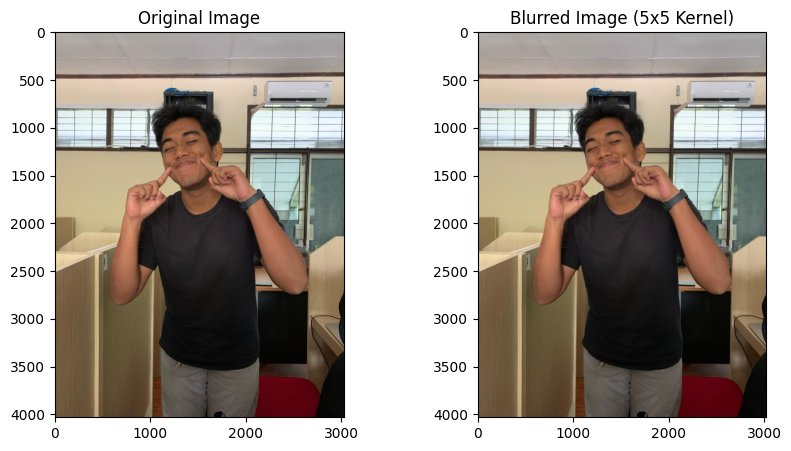

In [32]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load an image (you can replace this with any image file)
image_path = 'WhatsApp Image 2025-03-18 at 10.15.40_fe3d9620.jpg'  # Replace with your image path
image = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB format
image_array = np.array(image)

# Define a 5x5 kernel (filter)
# Example: Averaging (blur) kernel
kernel = np.ones((5, 5)) / 25

# Function to perform 2D convolution manually
def convolve2d_manual(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')

    # Initialize the output image
    output_image = np.zeros_like(image)

    # Perform convolution
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output_image[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output_image

# Initialize an empty array to store the filtered image
filtered_image = np.zeros_like(image_array)

# Perform convolution on each channel (R, G, B)
for i in range(3):  # Loop through the color channels (0: Red, 1: Green, 2: Blue)
    filtered_image[:, :, i] = convolve2d_manual(image_array[:, :, i], kernel)

# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_array)

plt.subplot(1, 2, 2)
plt.title('Blurred Image (5x5 Kernel)')
plt.imshow(filtered_image)

plt.show()

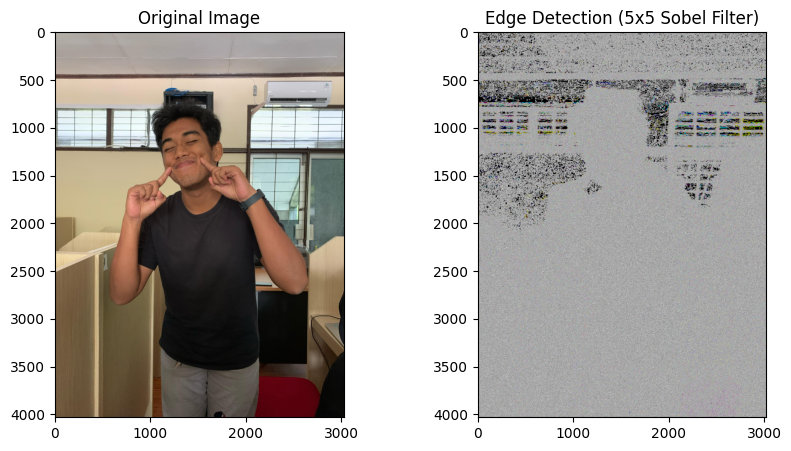

In [33]:
# Load an image (you can replace this with any image file)
image_path = 'WhatsApp Image 2025-03-18 at 10.15.40_fe3d9620.jpg'  # Replace with your image path
image = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB format
image_array = np.array(image)

# Define 5x5 edge detection kernels (Sobel filters)
sobel_x_5x5 = np.array([[-1, -2, 0, 2, 1],
                        [-2, -4, 0, 4, 2],
                        [-4, -8, 0, 8, 4],
                        [-2, -4, 0, 4, 2],
                        [-1, -2, 0, 2, 1]])  # Horizontal edge detection

sobel_y_5x5 = np.array([[-1, -2, -4, -2, -1],
                        [-2, -4, -8, -4, -2],
                        [0,  0,  0,  0,  0],
                        [2,  4,  8,  4,  2],
                        [1,  2,  4,  2,  1]])  # Vertical edge detection

# Function to perform 2D convolution manually
def convolve2d_manual(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')

    # Initialize the output image
    output_image = np.zeros_like(image)

    # Perform convolution
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output_image[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output_image

# Initialize an empty array to store the filtered image
edge_image = np.zeros_like(image_array)

# Perform convolution on each channel (R, G, B)
for i in range(3):  # Loop through the color channels (0: Red, 1: Green, 2: Blue)
    # Apply 5x5 Sobel filters to each channel
    grad_x = convolve2d_manual(image_array[:, :, i], sobel_x_5x5)
    grad_y = convolve2d_manual(image_array[:, :, i], sobel_y_5x5)

    # Combine the horizontal and vertical gradients
    edge_image[:, :, i] = np.sqrt(grad_x**2 + grad_y**2)

# Normalize the edge image to the range [0, 255]
edge_image = (edge_image / edge_image.max()) * 255

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_array)

plt.subplot(1, 2, 2)
plt.title('Edge Detection (5x5 Sobel Filter)')
plt.imshow(edge_image.astype(np.uint8), cmap='gray')  # Display as grayscale

plt.show()

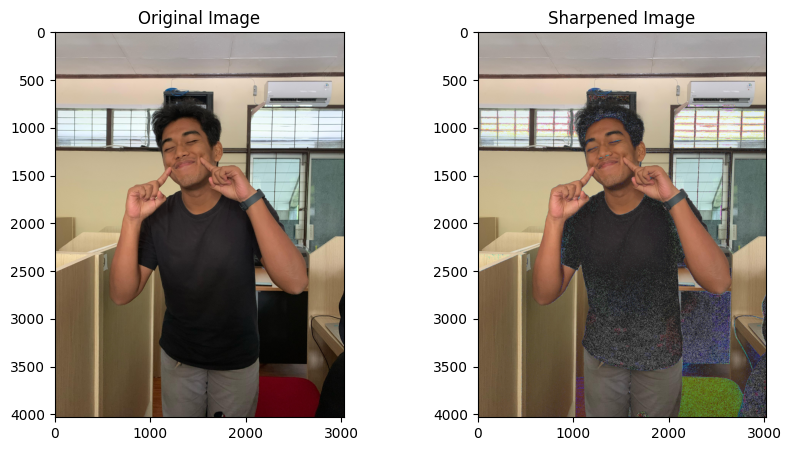

In [34]:
# Load an image (you can replace this with any image file)
image_path = 'WhatsApp Image 2025-03-18 at 10.15.40_fe3d9620.jpg'  # Replace with your image path
image = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB format
image_array = np.array(image)

# Define a sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Function to perform 2D convolution manually
def convolve2d_manual(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')

    # Initialize the output image
    output_image = np.zeros_like(image)

    # Perform convolution
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output_image[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output_image

# Initialize an empty array to store the sharpened image
sharpened_image = np.zeros_like(image_array)

# Perform convolution on each channel (R, G, B)
for i in range(3):  # Loop through the color channels (0: Red, 1: Green, 2: Blue)
    sharpened_image[:, :, i] = convolve2d_manual(image_array[:, :, i], sharpening_kernel)

# Clip values to ensure they are within the valid range [0, 255]
sharpened_image = np.clip(sharpened_image, 0, 255)

# Display the original and sharpened images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_array)

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_image.astype(np.uint8))

plt.show()